In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

# Project description
You work for the online store Ice, which sells video games all over the world. <br>
User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns. <br>
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017. <br>
The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature. <br>

#### Remark
It is not clear from the project description what does it mean whether a game succeeds or not. The primary goal of any commerce company is making money, so indicators of sales likely be our goal in this project. The secondary goal is to have a good scores by critics and users. It is not the same as sales, so it could be necessary investigate it. <br>
I think that in steps description there will be hints.

# Step 1. Open the data file and study the general information

In [204]:
data_games = pd.read_csv('games.csv')

#data_games = pd.read_csv('/datasets/games.csv')

In [205]:
data_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [206]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


0. **name**

In [207]:
# _Name_ column has two None-values
data_games.query('Name != Name')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [208]:
# platform _GEN_ is an oldschool one
print("Platform GEN has produced games in years:",np.sort(data_games.query('Platform == "GEN"')['Year_of_Release'].unique()))

Platform GEN has produced games in years: [1990. 1991. 1992. 1993. 1994.]


In [209]:
data_games.query('Platform == "GEN"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
145,Sonic the Hedgehog 2,GEN,1992.0,Platform,4.47,1.20,0.16,0.19,NaN,NaN,NaN
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
564,Mortal Kombat,GEN,1992.0,Fighting,1.95,0.63,0.00,0.09,NaN,NaN,NaN
588,Streets of Rage,GEN,1990.0,Action,1.86,0.55,0.11,0.08,NaN,NaN,NaN
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
832,NBA Jam,GEN,1992.0,Sports,1.75,0.25,0.00,0.05,NaN,NaN,NaN
960,Sonic & Knuckles,GEN,1994.0,Platform,1.24,0.43,0.03,0.12,NaN,NaN,NaN
996,Sonic the Hedgehog 3,GEN,1994.0,Platform,1.02,0.47,0.20,0.07,NaN,NaN,NaN
1099,Street Fighter II': Special Champion Edition,GEN,1992.0,Fighting,1.00,0.30,0.31,0.04,NaN,NaN,NaN
1365,Disney's The Lion King,GEN,1994.0,Platform,0.97,0.37,0.03,0.05,NaN,NaN,NaN


##### Mini conclusion
I think that Name of the game by itself is not a clue parameter for success story. <br>
But! There could be some relation success if the game is a sequel or prequel. <br>
Anyway I will remain this 2 rows without Name. <br>
I noted that some platform are really old. Do I need take into account of them when analysing?

1. **Platform**

In [210]:
np.sort(data_games['Platform'].unique())

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [211]:
print("Number of platforms:",len(data_games['Platform'].unique()))

Number of platforms: 31


##### Mini conclusion
There are a lot of platforms. <br>
Some of them refer to some families like PS-familie: PS, PS2, PS3, PS4 etc. <br>
There are no any of **None-values**

2. **Year_of_Release**

In [212]:
# filter None-values to find something interesting
data_games.query('Year_of_Release != Year_of_Release')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [213]:
print('Minimumal year of release:',data_games['Year_of_Release'].min())
print('Maximumal year of release:',data_games['Year_of_Release'].max())

Minimumal year of release: 1980.0
Maximumal year of release: 2016.0


##### Mini conclusion
I don't understand why there are not some data in year of release <br>
Madden NFL 2004 has been released in 2003 https://en.wikipedia.org/wiki/Madden_NFL_2004 <br>
FIFA Soccer 2004 has been released in 2003 https://en.wikipedia.org/wiki/FIFA_Football_2004 <br>
LEGO Batman: The Videogame has been released in 2008 https://en.wikipedia.org/wiki/Lego_Batman:_The_Videogame <br>
and so on ... <br>
It is clear that I can determine **year_of_release** using name of the game if it is includes number. <br>
Another way to determine **year_of_release** is to connect it with some platform. I think that platforms lifetime is not so long. <br>
Year of release varies form 1980 - 2016.

3. **Genre**

In [214]:
# find unique values
data_games['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [215]:
data_games.query('Genre != Genre')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


##### Mini conclusion
There is no something special about **Genre** <br>
Not many genres. All of them are really unique. I think it is good that Sports and Racing have been separated, because Racing I suppose is more success. <br>
We have encountered again with our old Nonamers-GEN.

4-7. **NA_sales**, **EU_sales**, **JP_sales**, **Other_sales**

In [216]:
data_games.tail(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [217]:
# calculate number of zeroes in JP_sales
print("Number of games saled in Japan in 0 copies:",len(data_games.query('JP_sales == 0')))

Number of games saled in Japan in 0 copies: 10514


##### Mini conclusion
I have noticed that there are a lot of zeros. I suppose it doesn't mean that nobody bought those games. It could so because nobody sold this games in that regions. <br>
There are no None-values. It is good.

8-9. **Critic_Score**, **User_Score**

In [218]:
# how many 
data_games.tail(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [219]:
print('Minimum of Critic Score:',data_games['Critic_Score'].min())
print('Maximum of Critic Score:',data_games['Critic_Score'].max())

Minimum of Critic Score: 13.0
Maximum of Critic Score: 98.0


In [220]:
data_games['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

##### There are numbers and strings. For instance, 'tbd', '3', '4' are strings.

In [221]:
# I have interpreted 'tbd' as 'to be determined' and assign it to NaN
data_games.loc[data_games['User_Score'] == "tbd",'User_Score'] = np.nan

In [222]:
# convert to float; 'tbd' doesn't prevent
# but there could be another words; so I remain errors='ignore'; 
data_games['User_Score'] = pd.to_numeric(data_games['User_Score'], downcast='float', errors='ignore')

In [223]:
np.sort(data_games['User_Score'].unique())

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan], dtype=float32)

In [224]:
print('Minimum of User Score:',data_games['User_Score'].min())
print('Maximum of User Score:',data_games['User_Score'].max())

Minimum of User Score: 0.0
Maximum of User Score: 9.699999809265137


In [225]:
# what does it means 0? take a look
data_games.query('User_Score == 0')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,NaN,0.0,E


In [226]:
# I think it is a mistake maybe typo; I assign it to NaN
data_games.loc[data_games['User_Score'] == 0, 'User_Score'] = np.nan

In [227]:
print('Minimum of User Score:',data_games['User_Score'].min())
print('Maximum of User Score:',data_games['User_Score'].max())

Minimum of User Score: 0.20000000298023224
Maximum of User Score: 9.699999809265137


##### Mini conclusion
We have only ~50% of critic scores and ~60% of users scores. <br>
Critic Score varies between 13.0-98.0. It is OK. We haven't got total loosers with zero-score and total winner with 100-score. <br>
User Score includes strings and float numbers. I have interpreted 'tbd' as 'to be determined' and assign it to None. <br>
I have converted user scores to float type. <br>
I found 0 scored game *My Little Pony: Pinkie Pie's Party* and decided that it is a mistake, I assign it to None <br>
User Score has a float type with a lot of unnecessary digits after dots. <br>
User Score varies between 0.2-9.7. It is differ from Critic Score. I could multiply it values by 10.

10. **Rating**

In [228]:
data_games['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

##### Mini conclusion
It is OK. Nothing special

# Results of Step 1
I have studied general information in game.csv table and have done moderate preprocessing of this data. <br>
I have noticed a lot of peculiarities in this data to use them later in preprocessing. <br>
I described all of them in **Mini conclusion** block in this step.


# Step 2. Prepare the data
1. Replace the column names (make them lowercase).
2. Convert the data to the required types.
3. Describe the columns where the data types have been changed and why.
4. If necessary, decide how to deal with missing values:
    + Explain why you filled in the missing values as you did or why you decided to leave them blank.
    + Why do you think the values are missing? Give possible reasons.
    + Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
5. Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

##### 2.1. Replace the column names (make them lowercase).

In [229]:
# initial columns in dataset
data_games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [230]:
# use lower() to lowercase all letters in column
data_games.columns = data_games.columns.str.lower()

In [231]:
# check
data_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [232]:
data_games.columns = ['name', 'platform', 'year', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

##### 2.2. Convert the data to the required types. + 2.3. Describe the columns where the data types have been changed and why.
I have done it in previous step. I have changed only User_score column because it has included texts.

In [233]:
# check
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   year          16446 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    7589 non-null   float32
 10  rating        9949 non-null   object 
dtypes: float32(1), float64(6), object(4)
memory usage: 1.3+ MB


##### 2.4. If necessary, decide how to deal with missing values:
    + Explain why you filled in the missing values as you did or why you decided to leave them blank.
    + Why do you think the values are missing? Give possible reasons.
    + Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.

**name** and **genre**: as I said in previous step I remained None-values because I can't reasonably assign some values. I could delete this 2 Nan rows but it has information about sales for platform GEN. There are not many information about this platform. Why the values are missing? Every game should have a name and genre if it exist. As for a game released only in Japan it could be a problem of font encoding, when some Japanese signs haven't been ported from database to database. I have checked that it isn't a duplicate of some row. <br>

**year_of_release**: as I said in previous step I am going to update this column. Update is below. Why the values are missing? It is just a mistake or maybe game has been released in different areas in differen years, so nobody knows what the year to use. <br>

**critic_score** and **user_score** and **rating**: I can't reasonably update this column. Moreover there are 50-60% of this Nan data, so if I replace these values by some mean values it make a huge contribution in final data analysis. Why the values are missing? There were not many scores before 1996. It weren't a usual case when game had a score. Later most of games have scores. <br>

I was right about **tbd** to be determined. I assigned as Nan because we don't have data about this values. These are not the games of last 2016 year. We could of course try to find a correlation between user and critic scores. Then try to recover some missing values. It is not a bad idea. But what the reason? If I want get some integreted parameter, I will create a new column and find for instance mean of this values, where it is possible.

In [234]:
# there were not many score before 1996
print("Critic unique scores before 1996:",data_games.query('year < 1996')['critic_score'].unique())
print("User unique scores before 1996:",data_games.query('year < 1996')['user_score'].unique())

Critic unique scores before 1996: [nan 69. 59. 85. 64.]
User unique scores before 1996: [nan 6.3 5.8 8.2 2.2]


##### year_of_release

In [235]:
print('Numer of None rows in year_of_release:', len(data_games.query('year != year')))

Numer of None rows in year_of_release: 269


In [236]:
def year_from_name_update(row):
    name = str(row['name'])   # used str() to Nan
    name_array = name.split()
    year = row['year']
    
    # try-except used to detect numbers written as strings
    for item in name_array:
        try:
            result = int(item)    # so this is a number
            
            # year == year means we know year of release
            # 2nd condition result < 2000 we use to avoid numbers like 2,3,99 etc. in name of game
            if year == year or result < 2000:   # we need use here additional condition > 2000
                return year
            else:
                return result - 1
            break
        except:
            continue   # this is a word not a number
    return year

data_games['year'] = data_games.apply(year_from_name_update, axis=1)

In [237]:
print('Numer of None rows in year_of_release after update:', len(data_games.query('year != year')))

Numer of None rows in year_of_release after update: 254


Not many 😊 but these years +/- 1 are correct.

In [238]:
# what platforms are remained with None-value in year?
data_games.query('year != year')['platform'].unique()

array(['Wii', '2600', 'X360', 'GBA', 'PC', 'PS3', 'PS', 'PSP', 'XB',
       'PS2', 'GB', 'DS', 'GC', '3DS', 'N64', 'PSV'], dtype=object)

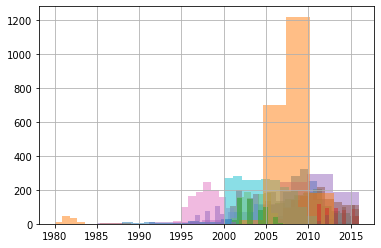

In [239]:
# plot histogram devided by platforms plotted by years
for item in data_games.query('year != year')['platform'].unique():
    data_games.query('platform == @item')['year'].hist(alpha = 0.5)
    
# result looks like a mess

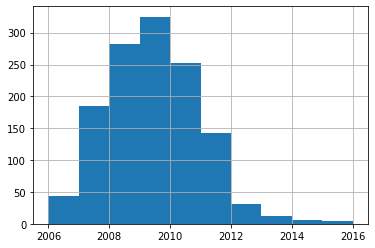

In [240]:
# look closer in some platforms: Wii
num_bins = int(data_games.query('platform == "Wii"')['year'].max() - data_games.query('platform == "Wii"')['year'].min())
data_games.query('platform == "Wii"')['year'].hist(bins=num_bins)

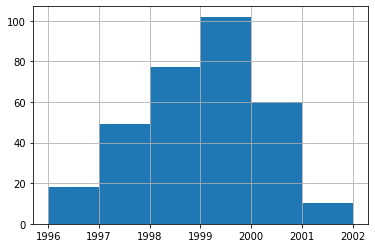

In [241]:
# look closer in some platforms: N64
num_bins = int(data_games.query('platform == "N64"')['year'].max() - data_games.query('platform == "N64"')['year'].min())
data_games.query('platform == "N64"')['year'].hist(bins=num_bins)

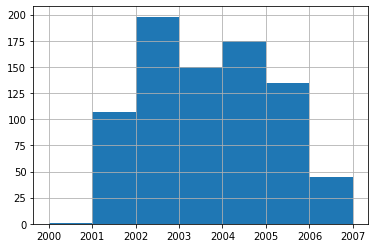

In [242]:
# look closer in some platforms: GBA
txt = "GBA"
num_bins = int(data_games.query('platform == @txt')['year'].max() - data_games.query('platform == @txt')['year'].min())
data_games.query('platform == @txt')['year'].hist(bins=num_bins)

I think it is not a big mistake to assign Nan values with median because major of this platforms exists for less than 10 years and had a gold time, when they produced more games than ever. There are exceptions like GBA-platform. But even for this exceptions this approximation is good enough. 

In [243]:
# determine median values by groupby()
platform_median_year = data_games.groupby('platform')['year'].median().reset_index()

In [244]:
# use apply() to update column year
# I used median values which are calculated for each platform separately
def year_from_platform_update(row):
    year = row['year']
    platform = row['platform']
    if year == year:
        return year
    else:
        for k,item in enumerate(platform_median_year['platform']):  #use cycle to find platform in platform_median_year
            if platform == item:
                return platform_median_year['year'][k]

data_games['year'] = data_games.apply(year_from_platform_update, axis=1)

In [245]:
data_games

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-warning" role="alert">
Correct approach but for some values you obtained strage years :) And it is better to convert year to int.</div>

**Tagir (30/08/2020):** facepalm 🤦‍♂️ why I even didn't check it

In [246]:
# I could use int() in update function
# I think astype() work with columns not with elements; so, it is faster
data_games['year'] = data_games['year'].astype('int')

In [247]:
# now it is empty
data_games[data_games["year"] == 2004.5].head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [248]:
data_games.year.unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

##### 2.5. Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [249]:
data_games['total_sales'] = data_games['na_sales'] + data_games['eu_sales'] + \
                            data_games['jp_sales'] + data_games['other_sales']

In [250]:
data_games.head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# Results of Step 2
I have prepared data to analyse it in the next steps. The main thing is that data was not bad. I had to update only two columns: year (filled none values by year in the name of game (minor data) and by median values calculated for each platform) and user_score (correct typos and mistakes; used astype()). The other columns didn't have problems with types and extraordinary data.

# Step 3. Analyze the data
- Look at how many games were released in different years. Is the data for every period significant?
- Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
- Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
- Work only with the data that you've decided is relevant. Disregard the data for previous years.
- Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
- Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
- Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
- Keeping your conclusions in mind, compare the sales of the same games on other platforms.
- Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

##### 3.1 Look at how many games were released in different years. Is the data for every period significant?

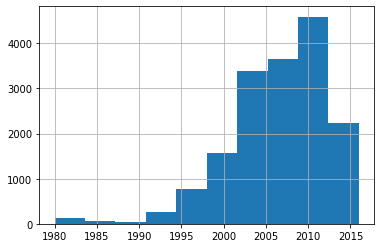

In [251]:
# plot histogram
data_games['year'].hist()

I see that boom of game producing and accordingly gaming started in 2000s. Last period here is less than others because data doesn't include 2016 year at all. 

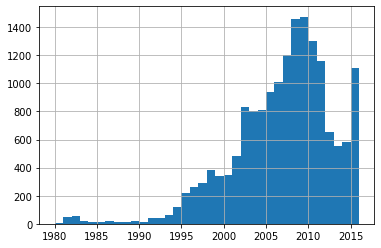

In [252]:
# the same histogram in details
data_games['year'].hist(bins=36)

Closer we see that boom started in 2002 year > 800 games in a year. Surprising we see that in 2012-2015 year number of produced games has been sharply reduced. It was surprising for me as I expected that this reduction should be releated to worlwide crisis in 2008-2009. Maybe I am right, there could be enough money to survive for several more years after the crisis. Let's take a look on how many platforms there were in 2009-2012 and how many remained in 2012-2015. I have chosen the same period (3 years).

In [253]:
2016-1980

36

In [254]:
# maybe sharply reduced number of games caused by decrease of number of platforms?
print('Number of games produced in 2008-2011:',len(data_games.query('2008<=year<=2011')))
print('Number of games produced in 2012-2015:',len(data_games.query('2012<=year<=2015')))

print('Number of platforms existed in 2008-2011:',len(data_games.query('2008<=year<=2011')['platform'].unique()))
print('Number of platforms existed in 2012-2015:',len(data_games.query('2012<=year<=2015')['platform'].unique()))

Number of games produced in 2008-2011: 5393
Number of games produced in 2012-2015: 2393
Number of platforms existed in 2008-2011: 11
Number of platforms existed in 2012-2015: 11


In [255]:
data_games.query('2008<=year<=2011')['platform'].unique()

array(['Wii', 'X360', 'DS', 'PS3', '3DS', 'PC', 'PSP', 'PS2', 'PSV', 'XB',
       'DC'], dtype=object)

In [256]:
data_games.query('2012<=year<=2015')['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

So, there were practically the same platforms. But they produced much less games than in 2008-2011

In [257]:
# determine best performance platforms in 2008-2011
data_games.query('2008<=year<=2011').groupby('platform')['name'].count().sort_values(ascending=False)

platform
DS      1400
Wii     1037
X360     735
PS3      721
PSP      603
PC       429
PS2      332
3DS      116
PSV       18
XB         1
DC         1
Name: name, dtype: int64

In [258]:
# save top_list
top_platforms_2008_11 = (data_games
    .query('2008<=year<=2011')
    .groupby('platform')['name']
    .count()
    .sort_values(ascending=False)
    .reset_index()
    .head()
    ['platform']
                        )

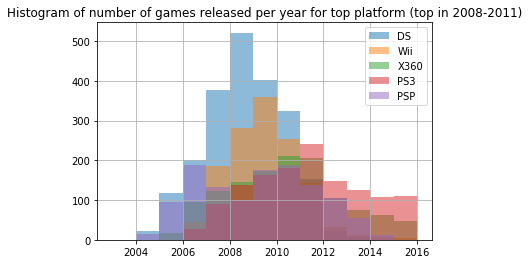

In [259]:
# plot top platform and look what happened in 2008-2011

k = 0
for k_platform in top_platforms_2008_11:
    num_bins = (data_games.query('platform == @k_platform ')['year'].max()
                - data_games.query('platform == @k_platform ')['year'].min())
    if k == 0:
        ax = data_games.query('platform == @k_platform ')['year'].hist(bins=13, alpha=0.5, label=k_platform, range=[2003,2016])
    else:
        data_games.query('platform == @k_platform ')['year'].hist(bins=num_bins, alpha=0.5, ax=ax, label=k_platform)
    k += 1

ax.set_title('Histogram of number of games released per year for top platform (top in 2008-2011)')
ax.legend()

So... we see the same pattern for all platforms. I think that it cause by global crisis. <br>
Another explanation of this fact is that another platform started to conquer markets.

In [260]:
# determine best performance platforms in 2012-2015
data_games.query('2012<=year<=2015').groupby('platform')['name'].count().sort_values(ascending=False)

platform
PS3     455
3DS     358
PSV     327
X360    279
PS4     228
PC      196
PSP     173
XOne    160
WiiU    133
Wii      53
DS       31
Name: name, dtype: int64

In [261]:
# save top_list
top_platforms_2012_15 = (data_games
    .query('2012<=year<=2015')
    .groupby('platform')['name']
    .count()
    .sort_values(ascending=False)
    .reset_index()
    [0:3]
    ['platform']
                        )

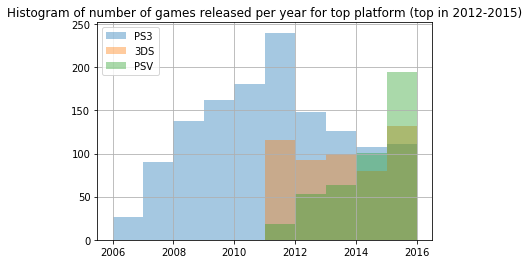

In [262]:
# plot top-3 platform and look what happened in 2012-2015

k = 0
for k_platform in top_platforms_2012_15:
    num_bins = (data_games.query('platform == @k_platform ')['year'].max()
                - data_games.query('platform == @k_platform ')['year'].min())
    if k == 0:
        ax = data_games.query('platform == @k_platform ')['year'].hist(bins=num_bins, alpha=0.4, label=k_platform)
    else:
        data_games.query('platform == @k_platform ')['year'].hist(bins=num_bins, alpha=0.4, ax=ax, label=k_platform)
    k += 1

ax.set_title('Histogram of number of games released per year for top platform (top in 2012-2015)')
ax.legend()

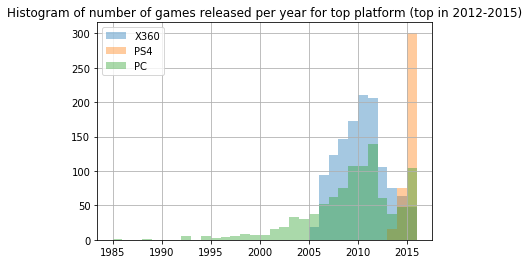

In [263]:
top_platforms_2012_15 = (data_games
    .query('2012<=year<=2015')
    .groupby('platform')['name']
    .count()
    .sort_values(ascending=False)
    .reset_index()
    [3:6]
    ['platform']
                        )

# plot (4,5,6) in the top platform and look what happened in 2012-2015

k = 0
for k_platform in top_platforms_2012_15:
    num_bins = (data_games.query('platform == @k_platform ')['year'].max()
                - data_games.query('platform == @k_platform ')['year'].min())
    if k == 0:
        ax = data_games.query('platform == @k_platform ')['year'].hist(bins=num_bins, alpha=0.4, label=k_platform)
    else:
        data_games.query('platform == @k_platform ')['year'].hist(bins=num_bins, alpha=0.4, ax=ax, label=k_platform)
    k += 1

ax.set_title('Histogram of number of games released per year for top platform (top in 2012-2015)')
ax.legend()

Although top-5 platforms has been changed, even here we see the same pattern of decrease of number of the produced games.

<div class="alert alert-warning" role="alert">
Same here</div>

##### 3.2 Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [264]:
# build (1) a pivot table of total sales grouped by platforms; number of games saved here too
# build (2) a pivot table of minimum and maximum year of release grouped by platforms
# merge builded pivot tables
# sorting in descending order by total sales (sum)
# reset index
df = (pd.merge(
    data_games.pivot_table(index=['platform'], values=['total_sales'], aggfunc=['sum','count']),
    data_games.pivot_table(index=['platform'], values=['year'], aggfunc=['min','max']),
    on='platform'
         ).
    sort_values(('sum','total_sales'), ascending=False).
    reset_index()
)

df.columns = ['platform','total_sales','num_games','first_release','last_release']
df.head()

,platform,total_sales,num_games,first_release,last_release
0,PS2,1255.77,2161,2000,2011
1,X360,971.42,1262,2005,2016
2,PS3,939.65,1331,2006,2016
3,Wii,907.51,1320,2006,2016
4,DS,806.12,2151,1985,2013


<div class="alert alert-success" role="alert">
Correctly merged data. Good work.</div>

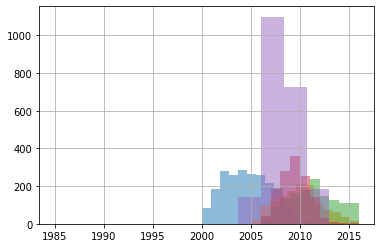

In [265]:
top_platforms = df[0:5]['platform']

# plot histogram for top platforms
# I did it in previous section to solve another problem, so it is not a dublicate
data_games.query('platform == "PS2" ')['year'].hist(bins=12,alpha=0.5)
data_games.query('platform == "X360" ')['year'].hist(bins=12,alpha=0.5)
data_games.query('platform == "PS3" ')['year'].hist(alpha=0.5)
data_games.query('platform == "Wii" ')['year'].hist(bins=10,alpha=0.5)
data_games.query('platform == "DS" ')['year'].hist(bins=12,alpha=0.5)

DS-platform, PS-2-platform and PS-3 used to be popular but now no one game is produced on it

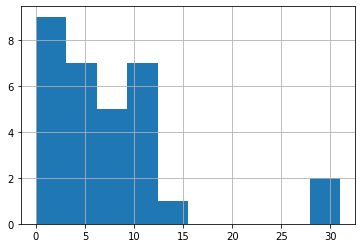

In [266]:
# calculate period of platform life
# life is a period of game producing
df['existance'] = df['last_release'] - df['first_release']

# plot histogram
df['existance'].hist()

There is a platform that exist for 30 years! Maybe it is PC, are we right?

In [267]:
df.sort_values('existance', ascending=False).head()

,platform,total_sales,num_games,first_release,last_release,existance
9,PC,259.52,974,1985,2016,31
4,DS,806.12,2151,1985,2013,28
12,GB,255.46,98,1988,2001,13
0,PS2,1255.77,2161,2000,2011,11
1,X360,971.42,1262,2005,2016,11


In [268]:
df.sort_values('existance', ascending=False).tail()

,platform,total_sales,num_games,first_release,last_release,existance
24,SCD,1.86,6,1993,1994,1
28,3DO,0.10,3,1994,1995,1
27,TG16,0.16,2,1995,1995,0
29,GG,0.04,1,1992,1992,0
30,PCFX,0.03,1,1996,1996,0


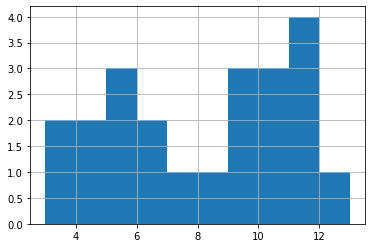

In [269]:
# So... it is PC and DS. This is outliers, I remove them from histogram
# and it is fair to take into account only platform with more than 20 games (remove outliers)
df.query('num_games > 20 & existance < 20')['existance'].hist(range=[3,13],bins=10)

In [270]:
# number of remained platforms
len(df.query('num_games > 20 & existance < 20'))

22

I see here two peaks: 5 and 11 years. It is less informative to use mean or median here, because there are two peaks. Naturally we could obtain something in the middle. <br>
So if the platform celebrate it's 8 years old, it has good chances to be alive till 10-11 years. <br>
Every company has chance 50-50 to be in the left or in the right peak.

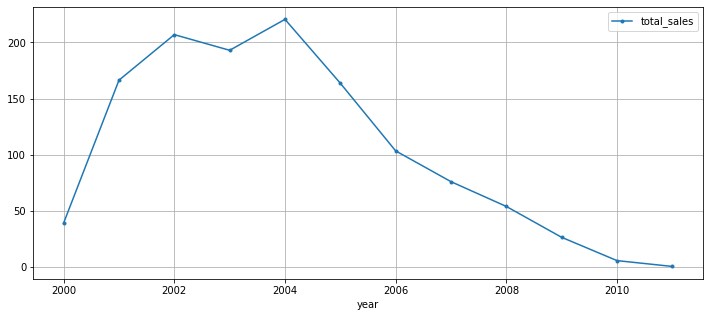

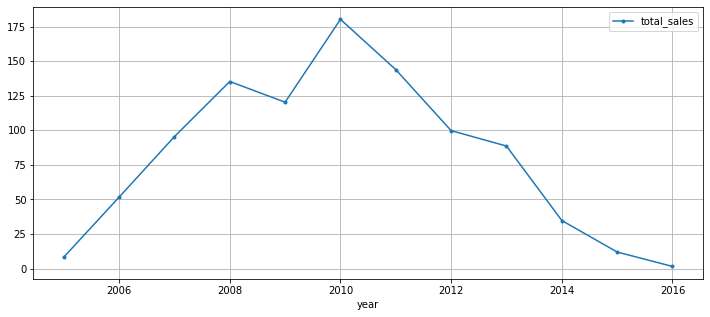

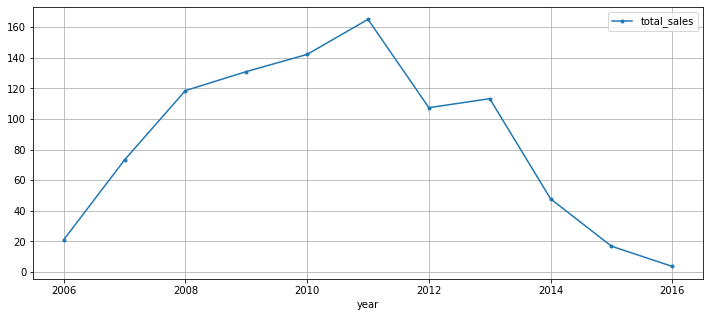

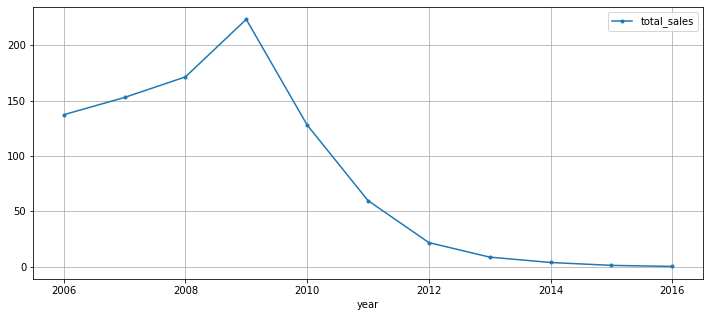

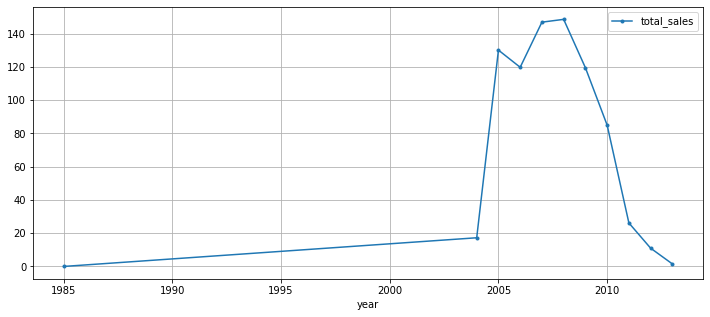

In [271]:
# now let's see in details top-platform and it's sales
for platform in top_platforms:
    (data_games
        .pivot_table(index=['platform','year'], values='total_sales', aggfunc='sum')
        .query('platform == @platform')    # there was only one game in 1985; I kicked it out
        .reset_index()
        .plot(x='year',grid=True, figsize=(12,5), marker='.',legend=True)
    )

So.. it takes at about 5-7 years from the peak to decrease to zero sales.

##### 3.3 Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

1. We defined that crisis greatly influenced on sales (see plot below) and number of produced games. As we try to predict something after crisis we should take into account only period 2012-2016.
2. We should remove outliers such as platforms with a few number of games. As we see previously that games were produced in 90-s.
3. Let's see on the last plot. It is DS-platform and its' sales. If we try to predict its' sales in 2013 (last point) based only on it's sales in 2005-2008 (top sales) we are fail. The best practice is to use trend in each platform. And we understand that the last point previous on predicted year should has the greatest influence. Thus it is pointless take into account more than 5 last years. It is 2012-2016. Otherwise we should use some weight parameters in each year.
4. Last year 2016 better to discard because not many time passed. Some releases in Q4 has bad sales.
**Summarize I will use only 2012-2015 years to predict sales for 2017.**

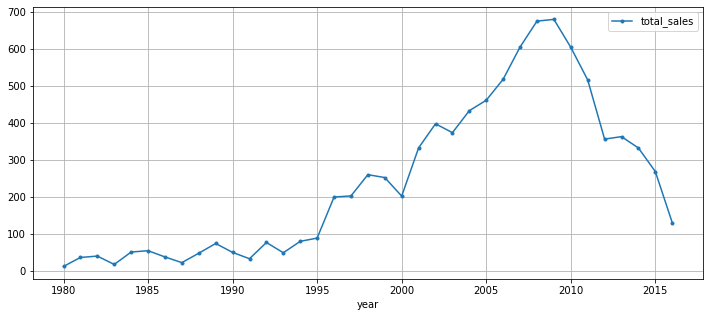

In [272]:
# total sales for all years
(data_games
    .pivot_table(index='year', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(12,5), marker='.')
)

##### 3.4 Work only with the data that you've decided is relevant. Disregard the data for previous years.

In [273]:
data_games_final = data_games.query('2012 <= year <= 2015').reset_index(drop=True)

In [274]:
print('Now we have only number of games:', len(data_games_final))
print('Number of games in initial data:', len(data_games))

Now we have only number of games: 2393
Number of games in initial data: 16715


It is only 10%; but other data is not relative to prognosis.

In [275]:
data_games_final.head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


##### 3.5 Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [276]:
sales_2012_2015 = (data_games_final
    .pivot_table(index='platform',values='total_sales',aggfunc=['sum','count'])
    .sort_values(('sum','total_sales'),ascending=False)
    .reset_index()
)

sales_2012_2015.columns = ['platform','total_sales', 'num_games']
sales_2012_2015.head(10)

,platform,total_sales,num_games
0,PS3,285.19,455
1,PS4,244.89,228
2,X360,235.02,279
3,3DS,180.66,358
4,XOne,133.17,160
5,WiiU,77.59,133
6,PC,57.40,196
7,PSV,45.19,327
8,Wii,35.19,53
9,DS,12.55,31


**PS3 is leading in sales**

In [277]:
data_platform_year = (data_games_final
     .pivot_table(index=['platform','year'], values='total_sales', aggfunc='sum')
     .reset_index()  
)
data_platform_year

,platform,year,total_sales
0,3DS,2012,51.36
1,3DS,2013,57.76
2,3DS,2014,43.76
3,3DS,2015,27.78
4,DS,2012,11.01
5,DS,2013,1.54
6,PC,2012,23.22
7,PC,2013,12.38
8,PC,2014,13.28
9,PC,2015,8.52


**shrinking**: 'PS3', , 'X360', '3DS', , 'WiiU', 'PC', 'PSV', 'Wii', 'DS', 'PSP' <br>
**growing**: 'XOne', 'PS4' <br>
**potentiall profitable** (high potential) 'XOne', 'PS4' and (medium potential) 'PC', 'PS3', 'PSV', 'WiiU', 'X360' <br>
Last platforms seems to be profitable cause decrease of their sales is not sharp. 

##### 3.6 Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

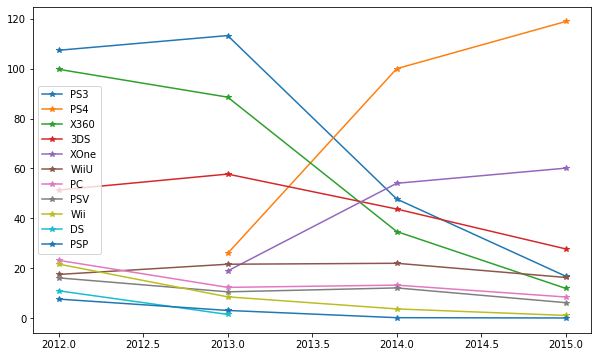

In [278]:
# total sales for all years
platforms = sales_2012_2015['platform']

plt.figure(figsize=(10,6))
for i_platform in platforms:
    plt.plot(data_platform_year.query('platform == @i_platform')['year']
             ,data_platform_year.query('platform == @i_platform')['total_sales']
             ,'-*'
             )
plt.legend(platforms)


(0, 3)

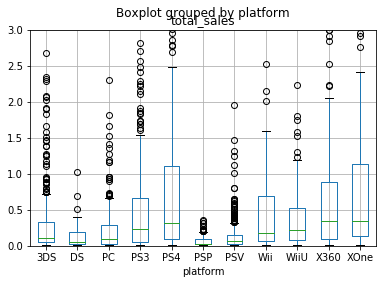

In [279]:
# boxplot
data_games_final.boxplot(by='platform', column=['total_sales'])
#data_platform_year.boxplot()
plt.ylim(0, 3)
# plt.xlim(0, 200)

##### Mini colclusion:
1. We see that top platforms has 5 times higher sells. The difference of averages is great.
2. As we mentioned above two platform sharply increase (PS4, XOne), whereas 2 another platform sharply decrease (PS3,X360). It isn't weird, because this platforms are the next generation of  platforms.
3. There are platform such as 'PC','PSV','WiiU' which decrease but not so fast. They keep their level.

Boxplot gives another kind of information. We can see who saled top-sales games. We can compare medians between platform.<br>
And we see a lot of outliers.

##### 3.7 Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

In [280]:
# PS4
platform = "PS4"
data_games_final.query('platform == @platform')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
14,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
17,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
18,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Natsuiro High School: Seishun Hakusho,PS4,2015,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02
2192,Rabbids Invasion: The Interactive TV Show,PS4,2014,Misc,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
2222,Professional Farmer 2016,PS4,2015,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
2263,Raven's Cry,PS4,2015,Role-Playing,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01


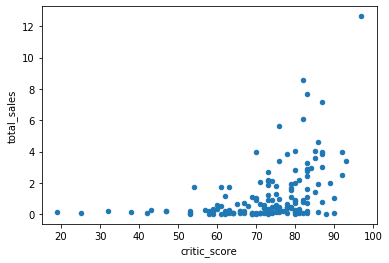

In [281]:
(data_games_final
    .query('platform == @platform')
    .plot
    .scatter(y='total_sales',x='critic_score')
)

In [282]:
(data_games_final.query('platform == @platform')['critic_score']
     .corr(data_games_final.query('platform == @platform')['total_sales'])
)

0.43184820499820037

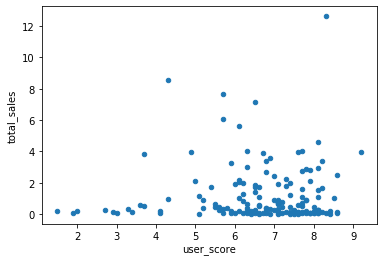

In [283]:
(data_games_final
    .query('platform == @platform')
    .plot
    .scatter(y='total_sales',x='user_score')
)

In [284]:
(data_games_final.query('platform == @platform')['user_score']
     .corr(data_games_final.query('platform == @platform')['total_sales'])
)

0.024230836706244346

We see that there is a weak correlation between critic_score and total_sales. There is no correlation between user_score and total_sales. Critics better understand how games could sales.

<div class="alert alert-warning" role="alert">
Correct but it is better to use scatterplot here and change axises as 'total_sales' is dependend variable it is more usual to see it on y-axis.</div>

**Tagir (30/08/2020) :** corrected

##### 3.8 Keeping your conclusions in mind, compare the sales of the same games on other platforms.

In [285]:
game = "Grand Theft Auto V"
data_games_final.query('name == @game')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
29,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
272,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17


In [286]:
game = "Call of Duty: Advanced Warfare"
data_games_final.query('name == @game')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
18,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
31,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
44,Call of Duty: Advanced Warfare,PS3,2014,Shooter,1.56,1.93,0.19,0.68,NaN,4.8,M,4.36
47,Call of Duty: Advanced Warfare,X360,2014,Shooter,2.77,1.11,0.00,0.40,NaN,4.9,M,4.28
684,Call of Duty: Advanced Warfare,PC,2014,Shooter,0.15,0.23,0.00,0.03,78.0,4.5,M,0.41


We see that game with great sales has a really good scores. We can't compare total numbers between different platform because <br>
1) time period when there were sales may differ <br>
2) cost could differ from platform to platform

##### 3.9 Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [316]:
data_games_final['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Racing', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

In [317]:
data_games_final.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre
Action          411.41
Shooter         266.58
Role-Playing    174.91
Sports          157.60
Misc             82.44
Platform         57.77
Racing           50.80
Fighting         40.02
Simulation       33.72
Adventure        25.70
Strategy         12.21
Puzzle            4.88
Name: total_sales, dtype: float64

We see that total sales are the most for Action genre. But the number of games could differ from genre to genre.

In [318]:
df1 = (data_games_final
       .pivot_table(index='genre', values='total_sales', aggfunc=['sum','count'])
       #.reset_index()
       .sort_values(('sum','total_sales'),ascending=False)
      )
df1.columns=['total_sales', 'games']
df1.head()

,total_sales,games
genre,,
Action,411.41,854
Shooter,266.58,189
Role-Playing,174.91,318
Sports,157.60,221
Misc,82.44,160


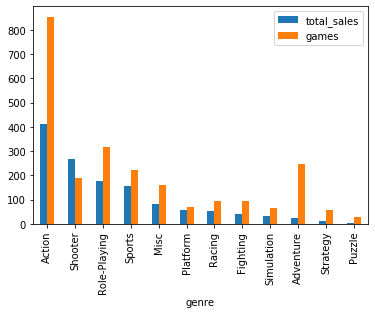

In [319]:
df1.plot(kind='bar')

In [320]:
df1 = df1.reset_index()

So.. it is natural that Action with 854 games has the great total_sales

In [321]:
df1['sales_per_game'] = df1['total_sales'] / df1['games']
df1.sort_values('sales_per_game', ascending=False)

,genre,total_sales,games,sales_per_game
1,Shooter,266.58,189,1.410476
5,Platform,57.77,70,0.825286
3,Sports,157.60,221,0.713122
6,Racing,50.80,92,0.552174
2,Role-Playing,174.91,318,0.550031
8,Simulation,33.72,64,0.526875
4,Misc,82.44,160,0.515250
0,Action,411.41,854,0.481745
7,Fighting,40.02,93,0.430323
10,Strategy,12.21,58,0.210517


So, Sales per game isthe best for Shooter. It is near 2 times higher than in other genres.

<div class="alert alert-success" role="alert">
Correct, but adding some chart would be nice.</div>

**Tagir (30/08/2020) :** corrected

# Results of Step 3
I have written mini results for each point.

# Step 4. Create a user profile for each region
For each region (NA, EU, JP), determine:
The top five platforms. Describe variations in their market shares from region to region.
The top five genres. Explain the difference.
Do ESRB ratings affect sales in individual regions?

##### NA sales

In [323]:
(data_games_final
       .pivot_table(index='platform', values=['na_sales'], aggfunc=['sum'])
       .reset_index()
       .sort_values(('sum','na_sales'),ascending=False)
       .head()
      )

,platform,sum
,,na_sales
9,X360,139.36
3,PS3,102.71
4,PS4,87.25
10,XOne,78.85
0,3DS,52.01


In [326]:
na_sales = (data_games_final
       .pivot_table(index='genre', values=['na_sales'], aggfunc=['sum','count'])
       .sort_values(('sum','na_sales'),ascending=False)
      )
na_sales.columns = ['total_sales_na', 'games']
na_sales['sales_per_game'] = na_sales['total_sales_na'] / na_sales['games']
na_sales.head()

,total_sales_na,games,sales_per_game
genre,,,
Action,168.73,854,0.197576
Shooter,128.57,189,0.680265
Sports,73.99,221,0.334796
Role-Playing,58.22,318,0.183082
Misc,37.43,160,0.233938


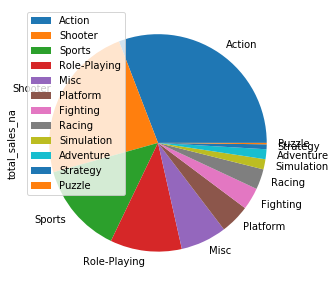

In [327]:
na_sales.plot.pie(y='total_sales_na', figsize=(5, 5))

In [328]:
na_sales = (data_games_final
       .pivot_table(index='rating', values=['na_sales'], aggfunc=['sum','count'])
       .reset_index()
       .sort_values(('sum','na_sales'),ascending=False)
      )
na_sales.columns = ['genre','total_sales_na', 'games']
na_sales['sales_per_game'] = na_sales['total_sales_na'] / na_sales['games']
na_sales.head()

,genre,total_sales_na,games,sales_per_game
2,M,215.90,420,0.514048
0,E,106.52,331,0.321813
1,E10+,72.15,258,0.279651
3,T,57.36,328,0.174878


##### EU sales

In [329]:
(data_games_final
       .pivot_table(index='platform', values=['eu_sales'], aggfunc=['sum'])
       .reset_index()
       .sort_values(('sum','eu_sales'),ascending=False)
       .head()
      )

,platform,sum
,,eu_sales
4,PS4,109.31
3,PS3,105.60
9,X360,73.81
10,XOne,41.96
0,3DS,40.52


In [331]:
eu_sales = (data_games_final
       .pivot_table(index='genre', values=['eu_sales'], aggfunc=['sum','count'])
       .sort_values(('sum','eu_sales'),ascending=False)
      )
eu_sales.columns = ['total_sales_eu', 'games']
eu_sales['sales_per_game'] = eu_sales['total_sales_eu'] / eu_sales['games']
eu_sales.head()

,total_sales_eu,games,sales_per_game
genre,,,
Action,148.85,854,0.174297
Shooter,97.59,189,0.516349
Sports,57.08,221,0.258281
Role-Playing,44.30,318,0.139308
Misc,25.66,160,0.160375


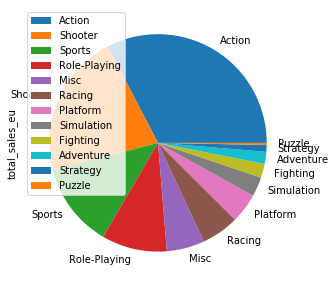

In [332]:
eu_sales.plot.pie(y='total_sales_eu', figsize=(5, 5))

In [337]:
eu_sales = (data_games_final
       .pivot_table(index='rating', values=['eu_sales'], aggfunc=['sum','count'])
       .reset_index()
       .sort_values(('sum','eu_sales'),ascending=False)
      )
eu_sales.columns = ['genre','total_sales_eu', 'games']
eu_sales['sales_per_game'] = eu_sales['total_sales_eu'] / eu_sales['games']
eu_sales.head()

,genre,total_sales_eu,games,sales_per_game
2,M,177.42,420,0.422429
0,E,99.44,331,0.300423
1,E10+,51.75,258,0.200581
3,T,43.22,328,0.131768


##### JP sales

In [338]:
(data_games_final
       .pivot_table(index='platform', values=['jp_sales'], aggfunc=['sum'])
       .reset_index()
       .sort_values(('sum','jp_sales'),ascending=False)
       .head()
      )

,platform,sum
,,jp_sales
0,3DS,79.81
3,PS3,33.99
6,PSV,17.55
8,WiiU,12.34
5,PSP,10.47


In [339]:
jp_sales = (data_games_final
       .pivot_table(index='genre', values=['jp_sales'], aggfunc=['sum','count'])
       .sort_values(('sum','jp_sales'),ascending=False)
      )
jp_sales.columns = ['total_sales_jp', 'games']
jp_sales['sales_per_game'] = jp_sales['total_sales_jp'] / jp_sales['games']
jp_sales.head()

,total_sales_jp,games,sales_per_game
genre,,,
Role-Playing,58.93,318,0.185314
Action,45.73,854,0.053548
Misc,11.82,160,0.073875
Simulation,10.08,64,0.157500
Fighting,8.69,93,0.093441


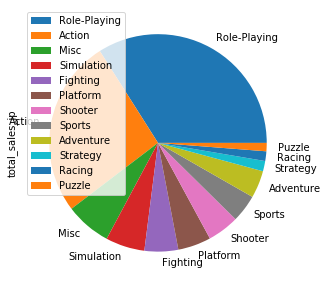

In [340]:
jp_sales.plot.pie(y='total_sales_jp', figsize=(5, 5))

In [341]:
jp_sales = (data_games_final
       .pivot_table(index='rating', values=['jp_sales'], aggfunc=['sum','count'])
       .reset_index()
       .sort_values(('sum','jp_sales'),ascending=False)
      )
jp_sales.columns = ['genre','total_sales_jp', 'games']
jp_sales['sales_per_game'] = jp_sales['total_sales_jp'] / jp_sales['games']
jp_sales.head()

,genre,total_sales_jp,games,sales_per_game
0,E,27.26,331,0.082356
3,T,23.82,328,0.072622
2,M,20.00,420,0.047619
1,E10+,7.74,258,0.030000


# Results of Step 4

One can see that in NA and EU people use the same platforms: X360, PS3, PS4, XOne, 3DS. Whereas in Japan another platforms are in the top list: + WiiU + PSP + PSV. It is worth to say that in USA people spend more money on games. As I know population in US  less than in NA but great than in JP. <br>
The same thing is about genre. Top list of genre is the same as for NA and EU: 'Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'. As for JP: 'Role-Playing', 'Action', 'Misc', 'Simulation', 'Fighting'. <br>
Ratings in NA and US: MATURE, EVERYONE, EVERYONE 10+, TEEN. The difference in JP between different ratings is not so high as it is in NA or EU.

# Step 5. Test the following hypotheses:
- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different. <br>
 Set the alpha threshold value yourself. <br>
 Explain:
- How you formulated the null and alternative hypotheses
- What significance level you chose to test the hypotheses, and why

In [95]:
# null: test the hypothesis that the means of the two statistical populations are equal based on samples taken from them
# alternative: there are not equal
platform_1 = "XOne"
platform_2 = "PC"


alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(
        data_games_final.query('platform == @platform_1')['user_score'].dropna(), 
        data_games_final.query('platform == @platform_2')['user_score'].dropna()
        )

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  0.9463222880879205
We can't reject the null hypothesis


In [96]:
print('Platform:', platform_1)
print('Average: {:.2f}'.format(data_games_final.query('platform == @platform_1')['user_score'].mean()))
print('Standard deviation: {:.2f}'.format(data_games_final.query('platform == @platform_1')['user_score'].std()))
print('Dispersion: {:.2f}'.format(data_games_final.query('platform == @platform_1')['user_score'].std()**2))

Platform: XOne
Average: 6.48
Standard deviation: 1.29
Dispersion: 1.66


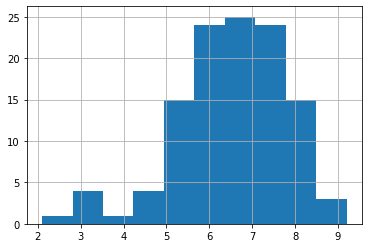

In [97]:
# histogram of XOne
data_games_final.query('platform == @platform_1')['user_score'].hist()

In [98]:
print('Platform:', platform_2)
print('Average: {:.2f}'.format(data_games_final.query('platform == @platform_2')['user_score'].mean()))
print('Standard deviation: {:.2f}'.format(data_games_final.query('platform == @platform_2')['user_score'].std()))
print('Dispersion: {:.2f}'.format(data_games_final.query('platform == @platform_2')['user_score'].std()**2))

Platform: PC
Average: 6.47
Standard deviation: 1.65
Dispersion: 2.71


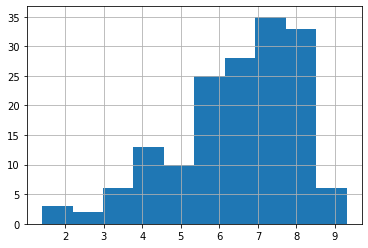

In [99]:
# histogram of PC
data_games_final.query('platform == @platform_2')['user_score'].hist()

We can see that distribution look similar <br>
We can't reject the hypothesis that the means of the this data are equal based on samples taken from them
significance level 0.05 is good enough here. It means that inside there are ~95% values. We shouldn't be too strict because there could be outliers and we shouldn't be to soft because we clear the data.

In [100]:
# null: test the hypothesis that the means of the two statistical populations are equal based on samples taken from them
# alternative: there are not equal
genre_1 = "Action"
genre_2 = "Sports"


alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(
        data_games_final.query('genre == @genre_1')['user_score'].dropna(), 
        data_games_final.query('genre == @genre_2')['user_score'].dropna()
        )

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  1.3026325860577522e-23
We reject the null hypothesis


In [101]:
print('Genre:', genre_1)
print('Average: {:.2f}'.format(data_games_final.query('genre == @genre_1')['user_score'].mean()))
print('Standard deviation: {:.2f}'.format(data_games_final.query('genre == @genre_1')['user_score'].std()))
print('Dispersion: {:.2f}'.format(data_games_final.query('genre == @genre_1')['user_score'].std()**2))

Genre: Action
Average: 6.86
Standard deviation: 1.35
Dispersion: 1.83


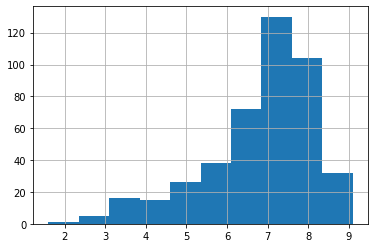

In [102]:
data_games_final.query('genre == @genre_1')['user_score'].hist()

In [103]:
print('Genre:', genre_2)
print('Average: {:.2f}'.format(data_games_final.query('genre == @genre_2')['user_score'].mean()))
print('Standard deviation: {:.2f}'.format(data_games_final.query('genre == @genre_2')['user_score'].std()))
print('Dispersion: {:.2f}'.format(data_games_final.query('genre == @genre_2')['user_score'].std()**2))

Genre: Sports
Average: 5.46
Standard deviation: 1.67
Dispersion: 2.78


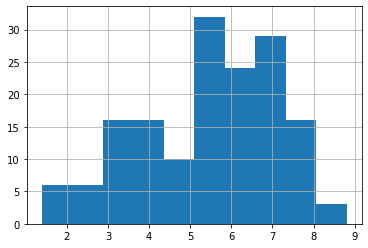

In [104]:
data_games_final.query('genre == @genre_2')['user_score'].hist()

We can see that the 2nd distribution has the 2nd peak about 3-4 <br>
We reject the hypothesis that the means of the this data are equal based on samples taken from them. That means that the distributions are different based on this data.
significance level 0.05 is good enough here. It means that inside there are ~95% values. We shouldn't be too strict because there could be outliers and we shouldn't be to soft because we clear the data.

# Step 6. Write a general conclusion
We understand that we don't need to use all data, because it brings us in general mistakes in prediction. We used only 4 years 2012-2015. We don't take into account the last year because some games from this period could be outliers. If the game was released in December. Sells of this game could be low, but in fact after some months it could high. It would be great if there was a column with month of release. I could use limit of 6 months to cut of this kind of data. <br>
We found that genres and rating influence on sells. And we found that in different countries we should take into account different things. NA and EU we can unite, JP not. <br>
NA have better sells per person than in EU and it has more population than in JP. <br>
**potentiall profitable** (high potential) 'XOne', 'PS4' and (medium potential) 'PC', 'PS3', 'PSV', 'WiiU', 'X360' <br>
**top genres in NA/EU** Action, Shooter, Sports, 'Role-Playing', 'Misc' <br>
**top ratings** MATURE, EVERYONE, EVERYONE 10+, TEEN

# How will my project be evaluated?
Read these project assessment criteria carefully before you get to work.
Here’s what project reviewers will be looking at when evaluating your project:
* How do you describe the problems you identify in the data?
* How do you prepare a dataset for analysis?
* How do you build distribution graphs and how do you explain them?
* How do you calculate standard deviation and variance?
* Do you formulate alternative and null hypotheses?
* What methods do you apply when testing them?
* Do you explain the results of your hypothesis tests?
* Do you follow the project structure and keep your code neat and comprehensible?
* Which conclusions do you reach?
* Did you leave clear, relevant comments at each step?

# it was interesting to read about "the futute"
https://4pda.ru/2018/01/06/348999/ <br>
Сайт также опубликовал и ряд других топов, одним из которых стал список самых высокооценённых платформ. Базировался этот топ на количестве положительных рецензий для игр конкретной системы. Лидером в 2017 году, несмотря на небывалый успех эксклюзивов Nintendo Switch и Wii U, стал «старый добрый» PC. На втором месте с небольшим отрывом расположилась Nintendo 3DS, «бронзу» разделили Xbox One и Switch, четвёртая строчка отошла PS4, а на пятом месте оказалась PS Vita.